# Analysis of Recent Development Indicators of Brazil

The present study has been conducted merely for study related reasons, more specifically, understanding how to use Python to read, clean, operate and draw conclusions from databases.

The database utilized in this work was downloaded from The World Bank's DataBank and may be found in the following link: https://databank.worldbank.org/reports.aspx?source=2&country=BRA. Note that it is also available along this notebook's file in https://github.com/devGvieira.

### Data reading, selection, cleaning and formatting
It is worth mentioning that given this work's objective, selecting three out of sixty indicators was considered enough.


In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

original_df = pd.read_csv('Data.csv',header=None)
i = (2,4,6)
selected_df = original_df.loc[i,6:15]
clean_df = selected_df.replace('..',np.NaN)
df = clean_df.astype(float)
df

,6,7,8,9,10,11,12,13,14,15
2,0.868346,0.857835,0.845993,0.811256,0.792263,0.793768,0.766108,0.665177,0.52859,0.459584
4,24.134768,24.342695,24.549506,24.749475,24.946335,25.145139,25.338518,25.507625,NaN,NaN
6,3.700000,3.300000,3.900000,4.700000,5.300000,5.300000,5.400000,1.900000,5.80000,NaN


### Shaping the axes for plotting

In [56]:
years = np.arange(2013,2023)

print(np.shape(years))

pg = df.loc[2,6:15]
pd = df.loc[4,6:15]
pv = df.loc[6,6:15]

print(np.shape(pg), np.shape(pd), np.shape(pv))

(10,)
(10,) (10,) (10,)


### Plotting graphs

/tmp/ipykernel_156872/1612170341.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


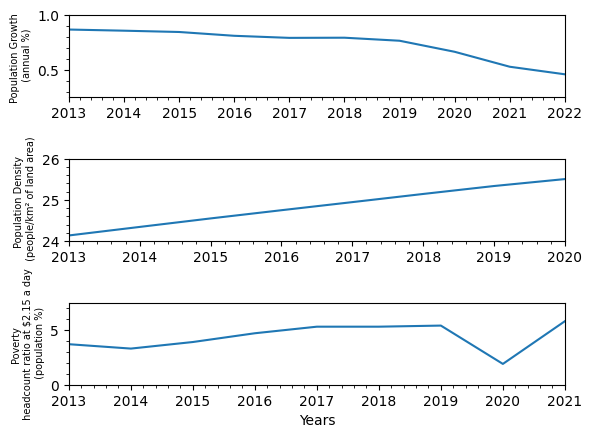

In [57]:
plt.title('Development Indexes Through Time')

plt.subplot(3,1,1)
plt.subplots_adjust(hspace=0.75)
plt.plot(years, pg)
plt.ylabel('Population Growth \n (annual %)', fontsize= 7)
plt.xlim(2013,2022)
plt.ylim(0.25,1)
plt.minorticks_on()

plt.subplot(3,1,2)
plt.plot(years, pd)
plt.ylabel('Population Density \n (people/km² of land area)', fontsize= 7)
plt.xlim(2013,2020)
plt.ylim(24,26)
plt.minorticks_on()

plt.subplot(3,1, 3)
plt.plot(years, pv)
plt.xlabel('Years')
plt.ylabel('Poverty \n headcount ratio at $2.15 a day \n (population %)', fontsize= 7)
plt.xlim(2013,2021)
plt.ylim(0,7.5)
plt.minorticks_on()

plt.show()

### Calculating largest and smallest values

In [58]:
min = df.min(axis =1)
max = df.max(axis=1)

print(min)
print(max)

idxmin = df.idxmin(axis=1)
idxmax = df.idxmax(axis=1)

print(idxmin)
print(idxmax)

2     0.459584
4    24.134768
6     1.900000
dtype: float64
2     0.868346
4    25.507625
6     5.800000
dtype: float64
2    15
4     6
6    13
dtype: int64
2     6
4    13
6    14
dtype: int64


### Calculating difference between the initial and final non-null values

In [59]:
pg_i = pg.iloc[0]
len(pg)
pg_f = pg.iloc[-1]
pg_diff = pg_f - pg_i

pd_i = pd.iloc[0]
pd_f = pd.iloc[7]
pd_diff = pd_f - pd_i

pv_i = pv.iloc[0]
pv_f = pv.iloc[8]
pv_diff = pv_f - pv_i

print(pg_diff, pd_diff, pv_diff)


-0.40876260167887396 1.3728577171475997 2.0999999999999996


## Analysis
Note that the population growth indicator is given in terms of annual percentage, the population density is given considering the amount of people living in one square kilometer of land area and the poverty indicator in terms of population percentage living on less than $2.15 per person each day.

### Qualitative Analysis
Given the graphs, it is perceptible that the annual population growth percentage continously decreased between the years 2013 and 2022, while during the 2013 to 2020 period the population density linearly increased and from 2013 to 2021 the percentage of people living in poverty increased, this last indicator presenting an odd variation between 2019 and 2021.   

### Quantitative Analysis
Considering now the difference between the initial and final values for the indicators, it was determined that, during its respective studied periods, the population growth percentage decreased 0.41%, the population density increased 1.37 and the percentage of population living in poverty increased by 2.01%.
Regarding the extreme values for each indicator during its respective selected periods, it was determined that the smallest percentage of population growth was 0.45% in 2022 and the greatest 0.57% in 2013, while the smallest population density was 24.13 in 2013 and the greatest 25.51 in 2020. Finally, regarding the minimum percentage of people living in poverty was 1.9% in 2020 and the maximum 5.8% in 2021.

## Conclusions
By means of numerically analyzing data of development indicators from Brazil, it became possible to determine that the in the last decade its population growth has decreased and the population density has increased. Therefore, although population growth has decreased, people are living in closer to each other.   
On what concerns poverty, it was determined that although its behaviour has been mostly constant, it presented an odd oscillation between 2019 and 2021 and an overall increase corresponding to the whole studied period.